In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

### Load the interactions summary from Human Promoter Analysis

In [29]:
df = pd.read_csv('Simulated_Data_Analysis_Ours_consensus_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [30]:
df.shape

(190, 12)

In [31]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter7<-->filter14,1378,SIX5_known1,0.038411,ELF1_known2,0.034990,102.0,48.0,3937.0,2587.0,6.449921e-61,2.198958e-59
1,filter7<-->filter16,1380,SIX5_known1,0.038411,ELF1_known2,0.043208,102.0,78.0,3315.0,2112.0,4.218134e-47,7.367625e-46
2,filter7<-->filter17,1381,SIX5_known1,0.038411,ELF1_known2,0.022154,102.0,78.0,3938.0,2109.0,6.940510e-29,5.130909e-28
3,filter7<-->filter19,1383,SIX5_known1,0.038411,ELF1_known2,0.000168,72.0,30.0,1051.0,1362.0,1.129890e-06,3.304727e-06
4,filter7<-->filter29,1393,SIX5_known1,0.038411,ELF1_known2,0.023373,84.0,132.0,2257.0,1959.0,2.178859e-41,2.933153e-40


##### keep significant interactions

In [32]:
df = df[df['adjusted_pval']<0.05]

In [33]:
df.shape

(130, 12)

#### keep motifs with q values less than threshold

In [45]:
threshold = 0.01
df = df[(df['motif1_qval'] < threshold) & (df['motif2_qval']<threshold)]

In [46]:
df.shape

(11, 15)

In [47]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
71,filter19<-->filter33,3623,ELF1_known2,0.000168,SIX5_known1,0.005286,66.0,132.0,1070.0,1192.0,4.337073e-08,1.350749e-07,ELF1,SIX5,ELF1<-->SIX5
83,filter19<-->filter181,3771,ELF1_known2,0.000168,SIX5_known1,0.000066,72.0,30.0,1070.0,1051.0,6.530007e-13,2.480727e-12,ELF1,SIX5,ELF1<-->SIX5
100,filter33<-->filter55,6060,SIX5_known1,0.005286,ELF1_known2,0.000260,66.0,150.0,1255.0,1250.0,8.195716e-09,2.642929e-08,SIX5,ELF1,SIX5<-->ELF1
103,filter33<-->filter91,6096,SIX5_known1,0.005286,ELF1_known2,0.002233,24.0,156.0,1721.0,834.0,5.062173e-19,2.440322e-18,SIX5,ELF1,SIX5<-->ELF1
105,filter33<-->filter111,6116,SIX5_known1,0.005286,ELF1_known2,0.001110,108.0,18.0,2111.0,1715.0,2.112776e-21,1.124811e-20,SIX5,ELF1,SIX5<-->ELF1


### Get TF-TF interactions

In [48]:
df['TF1'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF2'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [49]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+'<-->'+x['TF2'], axis=1)

In [50]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
71,filter19<-->filter33,3623,ELF1_known2,0.000168,SIX5_known1,0.005286,66.0,132.0,1070.0,1192.0,4.337073e-08,1.350749e-07,ELF1,SIX5,ELF1<-->SIX5
83,filter19<-->filter181,3771,ELF1_known2,0.000168,SIX5_known1,0.000066,72.0,30.0,1070.0,1051.0,6.530007e-13,2.480727e-12,ELF1,SIX5,ELF1<-->SIX5
100,filter33<-->filter55,6060,SIX5_known1,0.005286,ELF1_known2,0.000260,66.0,150.0,1255.0,1250.0,8.195716e-09,2.642929e-08,SIX5,ELF1,SIX5<-->ELF1
103,filter33<-->filter91,6096,SIX5_known1,0.005286,ELF1_known2,0.002233,24.0,156.0,1721.0,834.0,5.062173e-19,2.440322e-18,SIX5,ELF1,SIX5<-->ELF1
105,filter33<-->filter111,6116,SIX5_known1,0.005286,ELF1_known2,0.001110,108.0,18.0,2111.0,1715.0,2.112776e-21,1.124811e-20,SIX5,ELF1,SIX5<-->ELF1


In [51]:
df = df[df['TF1']!=df['TF2']]

In [52]:
df.shape

(11, 15)

In [42]:
df.head(10)

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
0,filter7<-->filter14,1378,SIX5_known1,0.038411,ELF1_known2,0.034990,102.0,48.0,3937.0,2587.0,6.449921e-61,2.198958e-59,SIX5,ELF1,SIX5<-->ELF1
1,filter7<-->filter16,1380,SIX5_known1,0.038411,ELF1_known2,0.043208,102.0,78.0,3315.0,2112.0,4.218134e-47,7.367625e-46,SIX5,ELF1,SIX5<-->ELF1
2,filter7<-->filter17,1381,SIX5_known1,0.038411,ELF1_known2,0.022154,102.0,78.0,3938.0,2109.0,6.940510e-29,5.130909e-28,SIX5,ELF1,SIX5<-->ELF1
3,filter7<-->filter19,1383,SIX5_known1,0.038411,ELF1_known2,0.000168,72.0,30.0,1051.0,1362.0,1.129890e-06,3.304727e-06,SIX5,ELF1,SIX5<-->ELF1
4,filter7<-->filter29,1393,SIX5_known1,0.038411,ELF1_known2,0.023373,84.0,132.0,2257.0,1959.0,2.178859e-41,2.933153e-40,SIX5,ELF1,SIX5<-->ELF1
6,filter7<-->filter37,1401,SIX5_known1,0.038411,RXRA_M4511_1.02,0.026517,72.0,48.0,1277.0,968.0,9.039650e-08,2.770112e-07,SIX5,RXRA,SIX5<-->RXRA
7,filter7<-->filter55,1419,SIX5_known1,0.038411,ELF1_known2,0.000260,36.0,36.0,1235.0,1415.0,5.862037e-05,1.599045e-04,SIX5,ELF1,SIX5<-->ELF1
10,filter7<-->filter91,1455,SIX5_known1,0.038411,ELF1_known2,0.002233,90.0,48.0,1693.0,993.0,6.541506e-14,2.584044e-13,SIX5,ELF1,SIX5<-->ELF1
11,filter7<-->filter98,1462,SIX5_known1,0.038411,ELF1_known2,0.044635,102.0,78.0,2469.0,1879.0,1.735935e-50,3.576782e-49,SIX5,ELF1,SIX5<-->ELF1
12,filter7<-->filter111,1475,SIX5_known1,0.038411,ELF1_known2,0.001110,102.0,24.0,2071.0,1898.0,7.038619e-26,4.493574e-25,SIX5,ELF1,SIX5<-->ELF1


In [43]:
df['adjusted_pval'].mean()

4.3971224927473216e-05

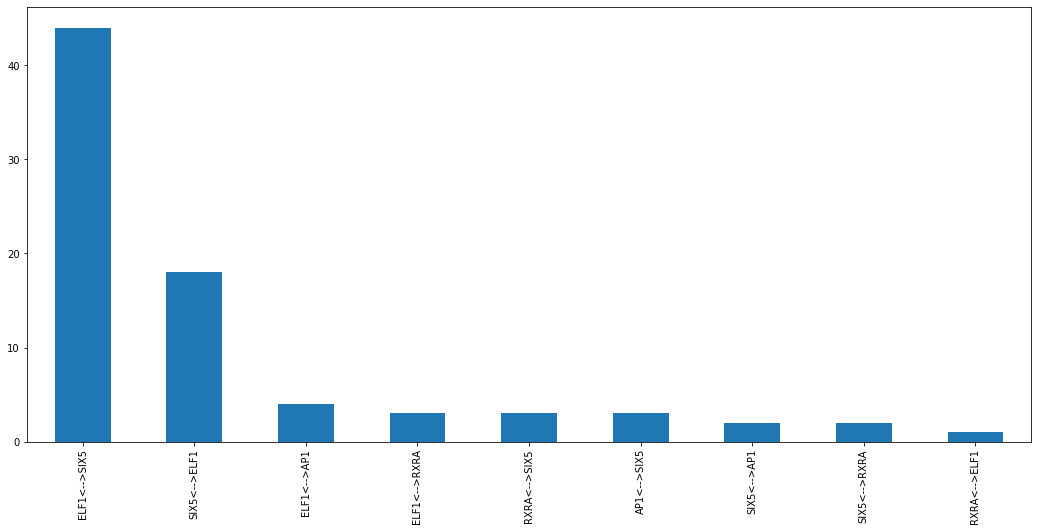

In [44]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

In [138]:
df.columns

Index(['filter_interaction', 'example_no', 'motif1', 'motif1_qval', 'motif2',
       'motif2_qval', 'mean_distance', 'mean_distance_bg', 'num_obs',
       'num_obs_bg', 'pval', 'adjusted_pval', 'TF1', 'TF2', 'TF_interaction'],
      dtype='object')

In [143]:
df[['filter_interaction','TF_interaction','adjusted_pval']]

,filter_interaction,TF_interaction,adjusted_pval
109,filter33<-->filter170,SIX5<-->ELF1,1.471536e-42
187,filter170<-->filter181,ELF1<-->SIX5,1.502774e-39
105,filter33<-->filter111,SIX5<-->ELF1,1.124811e-20
173,filter111<-->filter181,ELF1<-->SIX5,3.170740e-22
103,filter33<-->filter91,SIX5<-->ELF1,2.440322e-18
160,filter91<-->filter181,ELF1<-->SIX5,2.138248e-12
100,filter33<-->filter55,SIX5<-->ELF1,2.642929e-08
133,filter55<-->filter181,ELF1<-->SIX5,3.835112e-04
71,filter19<-->filter33,ELF1<-->SIX5,1.350749e-07
83,filter19<-->filter181,ELF1<-->SIX5,2.480727e-12
